<a href="https://colab.research.google.com/github/bingsen-wang/Math/blob/main/PolarCoordinates_ConeVolume_anim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Cone Volume</h1></b>

Dr. Bingsen Wang

4/2/2025
</center>

#Python Code

0


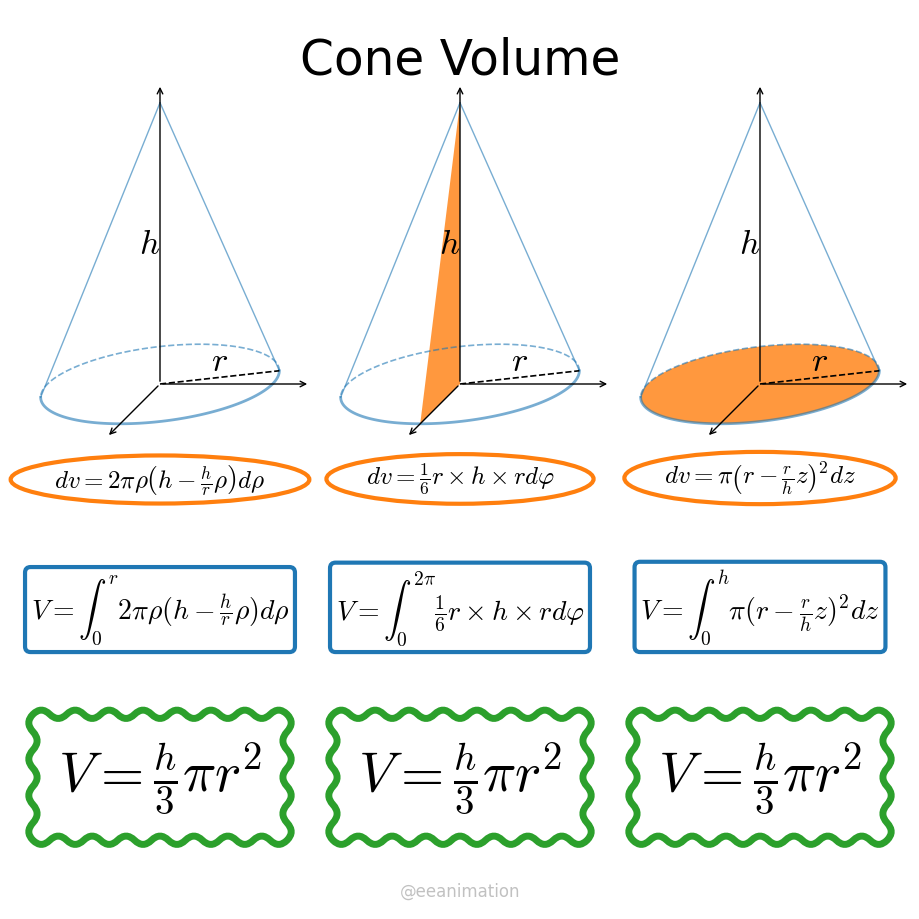

In [ ]:
from matplotlib import pyplot,animation,cm,patches,path
import numpy as np
pyplot.rcParams.update({"font.family":"sans-serif", "mathtext.fontset":"cm"})

def c32(xyz):
  return np.array([xyz[1]-xyz[0]*np.sin(np.pi/4)/2,xyz[2]-xyz[0]*np.cos(np.pi/4)/2])

Nf=600
cl = list(cm.tab10.colors) #colors of lines
fig = pyplot.figure(figsize=([9,9]))
xlim=[-1.2,1.2];ylim=[-1.2,1.2]
ax1 = fig.add_axes([0,0,1,1],xlim=xlim,ylim=ylim,fc='none'); ax1.axis('off')
ax = fig.add_axes([0,0,1,1],xlim=xlim,ylim=ylim,fc='none'); ax.axis('off')
ax.text(np.sum(xlim)/2,1, 'Cone Volume', size=35,ha='center',va='bottom')
t1=np.pi-np.atan(2*np.sqrt(2)); t2=t1+np.pi;
theta=np.linspace(t1,t2,100)
xy=np.array([[-.8,.2],[0,.2],[.8,.2]])
xm,ym,zm=.4,.4,.8
r,h=.3,.75
rho=np.linspace(0,r,Nf)
phi=np.linspace(0,2*np.pi,Nf)
z=np.linspace(0,h,Nf)
t1_index=min(range(len(phi)), key=lambda i: abs(phi[i]-t1))
t2_index=min(range(len(phi)), key=lambda i: abs(phi[i]-t2))
for k in range(3):
  [ax.annotate('',xy[k]+[c32([xm,0,0]),c32([0,ym,0]),c32([0,0,zm])][i],xy[k],arrowprops=dict(arrowstyle='->',lw=1,color='k')) for i in range(3)] #x,y,z-axis
  ax.plot(xy[k][0]+r*c32([np.cos(theta),np.sin(theta),0*theta])[0],xy[k][1]+r*c32([np.cos(theta),np.sin(theta),0*theta])[1],'--',c=cl[0],lw=1.2,alpha=.6) #base arc
  ax.plot(xy[k][0]+r*c32([-np.cos(theta),-np.sin(theta),0*theta])[0],xy[k][1]+r*c32([-np.cos(theta),-np.sin(theta),0*theta])[1],'-',c=cl[0],lw=2,alpha=.6) #base arc
  [ax.plot([xy[k][0]+r*c32([np.cos(t1+np.pi*i),np.sin(t1+np.pi*i),0])[0],xy[k][0]],[xy[k][1]+r*c32([np.cos(t1+np.pi*i),np.sin(t1+np.pi*i),0])[1],xy[k][1]+h],c=cl[0],lw=1,alpha=.6) for i in range(2)]
  ax.plot([xy[k][0],xy[k][0]+r*c32([np.cos(t1),np.sin(t1),0])[0]],[xy[k][1],xy[k][1]+r*c32([np.cos(t1),np.sin(t1),0])[1]],'--',c='k',lw=1.2)
  ax.text(xy[k][0]+r*c32([np.cos(t1),np.sin(t1),0])[0]/2,xy[k][1]+r*c32([np.cos(t1),np.sin(t1),0])[1]/2,'$r$',size=25,c='k',ha='center',va='bottom')
  ax.text(xy[k][0],xy[k][1]+h/2,'$h$',size=25,c='k',ha='right',va='center')

  ax.text(xy[k][0],xy[k][1]-.3, [r'$dv=2\pi\rho\left(h-\frac{h}{r}\rho\right)d\rho$',
                                 r'$dv=\frac{1}{6}r\times h\times rd\varphi$',
                                 r'$dv = \pi \left(r-\frac{r}{h}z\right)^2 dz$',][k], size=18,ha='center',va='bottom',
          bbox=dict(boxstyle='ellipse',pad=0,facecolor='none',edgecolor=cl[1],lw=3))

  ax.text(xy[k][0],xy[k][1]-.7, [r'$V=\int_0^r 2\pi\rho(h-\frac{h}{r}\rho) d\rho$',
                                 r'$V=\int_0^{2\pi} \frac{1}{6}r\times h\times rd\varphi$',
                                 r'$V=\int_0^h  \pi (r-\frac{r}{h}z)^2 dz$'][k], size=20,ha='center',va='bottom',
          bbox=dict(boxstyle='round',pad=.2,facecolor='none',edgecolor=cl[0],lw=3))
  ax.text(xy[k][0],xy[k][1]-1.15, [r'$V= \frac{h}{3}\pi r^2$',r'$V= \frac{h}{3}\pi r^2$',r'$V= \frac{h}{3}\pi r^2$'][k], size=40,ha='center',va='bottom',
          bbox=dict(boxstyle='roundtooth',pad=.6,facecolor='none',edgecolor=cl[2],lw=5))
dr=.01;rlst=np.sqrt(np.linspace(0,1,Nf))*(r-dr);
dt=np.pi/120;tlst=np.linspace(t1,t2-dt,Nf)
def animate(i):
  # i=400
  if i%50==0: print(i)
  ax1.cla(); ax1.set_xlim(xlim); ax1.set_ylim(ylim); ax1.axis('off')
  #varying rho

  verts=[xy[0]+c32([rho[i]*np.cos(t),rho[i]*np.sin(t),0]) for t in theta+np.pi]+[xy[0]+c32([rho[i]*np.cos(t),rho[i]*np.sin(t),h-h/r*rho[i]]) for t in theta+np.pi][::-1]+[(0,0)]
  codes=[path.Path.MOVETO]+[path.Path.LINETO]*(len(verts)-2)+[path.Path.CLOSEPOLY]
  ax1.add_patch(patches.PathPatch(path.Path(verts,codes),fc=cl[1],ec='none',alpha=.8,zorder=1))
  ax1.plot(xy[0][0]+c32([rho[i]*np.cos(theta),rho[i]*np.sin(theta),0*theta+h-h/r*rho[i]])[0],xy[0][1]+c32([rho[i]*np.cos(theta),rho[i]*np.sin(theta),0*theta+h-h/r*rho[i]])[1],'--',c=cl[1],lw=1.2,zorder=-2)
  verts=[xy[0]+c32([rho[i]*np.cos(t),rho[i]*np.sin(t),h-h/r*rho[i]]) for t in theta+np.pi]+[xy[0]+c32([0,0,h])]+[(0,0)]
  codes=[path.Path.MOVETO]+[path.Path.LINETO]*(len(verts)-2)+[path.Path.CLOSEPOLY]
  ax1.add_patch(patches.PathPatch(path.Path(verts,codes),fc=cl[0],ec='none',alpha=.8,zorder=1))

  #varying phi
  if i<t1_index:
    verts=[xy[1]+c32([r*np.cos(t),r*np.sin(t),0]) for t in phi[:i+1]]+[xy[1]+c32([0,0,h])]+[(0,0)]
    codes=[path.Path.MOVETO]+[path.Path.LINETO]*(len(verts)-2)+[path.Path.CLOSEPOLY]
    ax1.add_patch(patches.PathPatch(path.Path(verts,codes),fc=cl[0],ec='none',alpha=.8,zorder=1))
  elif i<t2_index:
    verts=[xy[1]+c32([r*np.cos(t),r*np.sin(t),0]) for t in phi[:t1_index+1]]+[xy[1]+c32([0,0,h])]+[(0,0)]
    codes=[path.Path.MOVETO]+[path.Path.LINETO]*(len(verts)-2)+[path.Path.CLOSEPOLY]
    ax1.add_patch(patches.PathPatch(path.Path(verts,codes),fc=cl[0],ec='none',alpha=.8,zorder=1))

    verts=[xy[1]+c32([r*np.cos(t),r*np.sin(t),0]) for t in phi[t1_index:i+1]]+[xy[1]+c32([0,0,h])]+[(0,0)]
    codes=[path.Path.MOVETO]+[path.Path.LINETO]*(len(verts)-2)+[path.Path.CLOSEPOLY]
    ax1.add_patch(patches.PathPatch(path.Path(verts,codes),fc=cl[0],ec='none',alpha=.8,zorder=-1))
  else:
    verts=[xy[1]+c32([r*np.cos(t),r*np.sin(t),0]) for t in phi[:t1_index+1]]+[xy[1]+c32([0,0,h])]+[(0,0)]
    codes=[path.Path.MOVETO]+[path.Path.LINETO]*(len(verts)-2)+[path.Path.CLOSEPOLY]
    ax1.add_patch(patches.PathPatch(path.Path(verts,codes),fc=cl[0],ec='none',alpha=.8,zorder=1))

    verts=[xy[1]+c32([r*np.cos(t),r*np.sin(t),0]) for t in phi[t1_index:t2_index+1]]+[xy[1]+c32([0,0,h])]+[(0,0)]
    codes=[path.Path.MOVETO]+[path.Path.LINETO]*(len(verts)-2)+[path.Path.CLOSEPOLY]
    ax1.add_patch(patches.PathPatch(path.Path(verts,codes),fc=cl[0],ec='none',alpha=.8,zorder=-1))

    verts=[xy[1]+c32([r*np.cos(t),r*np.sin(t),0]) for t in phi[t2_index:i+1]]+[xy[1]+c32([0,0,h])]+[(0,0)]
    codes=[path.Path.MOVETO]+[path.Path.LINETO]*(len(verts)-2)+[path.Path.CLOSEPOLY]
    ax1.add_patch(patches.PathPatch(path.Path(verts,codes),fc=cl[0],ec='none',alpha=.8,zorder=1))
  verts=[xy[1],xy[1]+c32([r*np.cos(phi[i]),r*np.sin(phi[i]),0]),xy[1]+c32([0,0,h])]+[(0,0)]
  codes=[path.Path.MOVETO]+[path.Path.LINETO]*(len(verts)-2)+[path.Path.CLOSEPOLY]
  ax1.add_patch(patches.PathPatch(path.Path(verts,codes),fc=cl[1],ec='none',lw=2,alpha=.8,zorder=0))

  #varying z
  verts=[xy[2]+c32([(r-z[i]*r/h)*np.cos(t),(r-z[i]*r/h)*np.sin(t),z[i]])for t in phi]+[(0,0)]
  codes=[path.Path.MOVETO]+[path.Path.LINETO]*(len(verts)-2)+[path.Path.CLOSEPOLY]
  ax1.add_patch(patches.PathPatch(path.Path(verts,codes),fc=cl[1],ec='none',alpha=.8))
  verts=[xy[2]+c32([(r-z[i]*r/h)*np.cos(t),(r-z[i]*r/h)*np.sin(t),z[i]])for t in theta+np.pi]+[xy[2]+c32([r*np.cos(t),r*np.sin(t),0])for t in theta+np.pi][::-1]
  codes=[path.Path.MOVETO]+[path.Path.LINETO]*(len(verts)-2)+[path.Path.CLOSEPOLY]
  ax1.add_patch(patches.PathPatch(path.Path(verts,codes),fc=cl[0],ec='none',lw=2,alpha=.8))
  return

ax.text(np.average(ax.get_xlim()),ax.get_ylim()[0]*.99+ax.get_ylim()[1]*.01,r'@eeanimation',size=12,c='.2',alpha=.3,ha='center',va='bottom')
anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=20)
# anim.save("volume_cone.mp4",writer=animation.FFMpegWriter(fps=60),dpi=200)